In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Survay losss

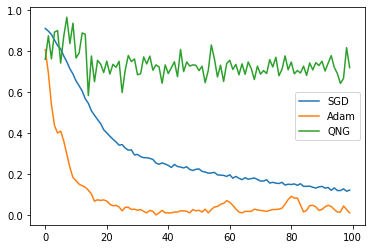

In [7]:
state = 'ghz'
ansatz = 'linear_ansatz_'
path = "../experiments/" + ansatz + state + "/" + str(3) + '/loss_values_sgd.csv'
loss1 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "../experiments/" + ansatz + state + "/" + str(3) + '/loss_values_adam.csv'
loss2 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "../experiments/" + ansatz + state + "/" + str(3) + '/loss_values_qng.csv'
loss3 = pd.read_csv(path, sep=",", header=None).to_numpy()
plt.plot(loss1, label = 'SGD')
plt.plot(loss2, label = 'Adam')
plt.plot(loss3, label = 'QNG')
plt.savefig(state.upper() + ' state - ' + ansatz + '.eps', dpi = 1000)
plt.legend()

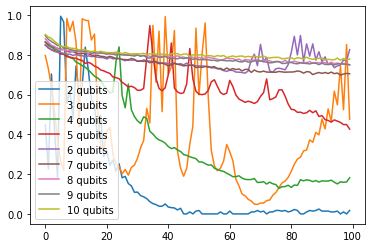

In [57]:
losss = []

for i in range(2, 11):
    path = "../experiments/linear_ansatz_w/" + str(i) + '/loss_values_qng.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = str(i) + ' qubits')
plt.legend()
plt.show()

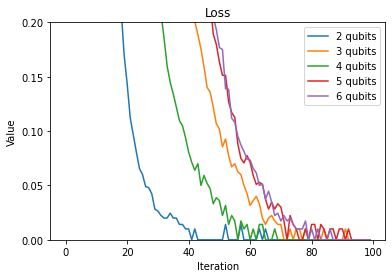

In [53]:
losss = []

for i in range(2, 7):
    path = "../experiments/star_ansatz_ghz/" + str(i) + '/loss_values_sgd.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = str(i) + ' qubits')

plt.xlabel('Iteration')
plt.ylim((0,0.2))
plt.yticks(np.arange(0, 0.25, 0.05))
plt.ylabel('Value')
plt.title('Loss')
plt.legend()
plt.show()

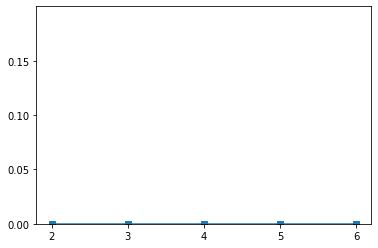

In [62]:
qubits = range(2, 7)
star_ansatz = []
for i in qubits:
    path = "../experiments/star_ansatz_" + 'ghz' + "/" + str(i) + '/loss_values_' + 'sgd' + '.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    star_ansatz.append((loss[-1]))

plt.ylim((0,0.2))
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 0.2, 0.05))
plt.plot(qubits, star_ansatz, marker='s', label = 'Star ansatz')


In [49]:
def get_loss(reconstruted_state, optimizer):
    losss_linear, losss_star, losss_polygon = [], [], []
    qubits = range(2, 11)
    for i in qubits:
        path = "../experiments/linear_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_linear.append(np.min(loss))
    for i in qubits:
        path = "../experiments/star_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_star.append(np.min(loss))
    for i in qubits:
        path = "../experiments/polygon_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_polygon.append(np.min(loss))
    plt.plot(qubits, losss_linear, marker='o', color = 'blue', label = 'Linear ansatz')
    plt.plot(qubits, losss_star, marker='s', color = 'orange', label = 'Star ansatz')
    plt.plot(qubits, losss_polygon, marker='^', color = 'green', label = 'Polygon ansatz')
    plt.xlabel('Number of qubits')
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.ylabel('Fubini-study loss')
    # plt.text(3.5, 0.5, optimizer.upper())
    plt.title(reconstruted_state.upper() + ' state preparation')
    plt.legend()
    plt.savefig(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer.eps', dpi = 1000)
    plt.show()

# get_loss('ghz', 'qng')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


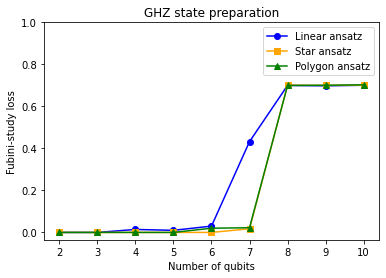

In [50]:
get_loss('ghz', 'adam')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


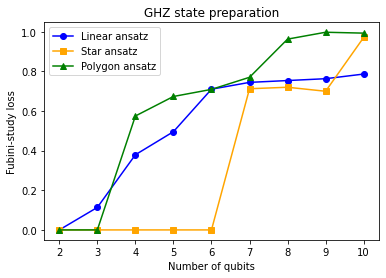

In [52]:
get_loss('ghz', 'sgd')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


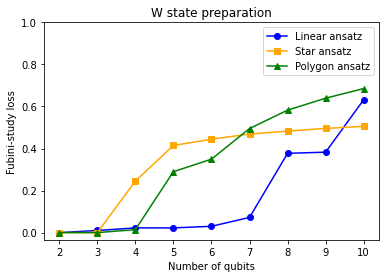

In [55]:
get_loss('w', 'adam')

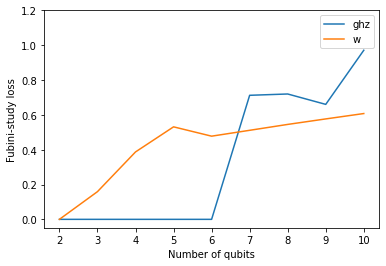

In [43]:
def get_loss(reconstruted_state, optimizer):
    losss_linear, losss_star, losss_polygon = [], [], []
    qubits = range(2, 11)
    for i in qubits:
        path = "../experiments/star_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_star.append(np.min(loss))

    plt.plot(qubits, losss_star, label = reconstruted_state)
    plt.xlabel('Number of qubits')
    plt.yticks(np.arange(0, 1.4, 0.2))
    plt.ylabel('Fubini-study loss')
    # plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
    plt.legend()

get_loss('ghz', 'sgd')
get_loss('w', 'sgd')
plt.show()

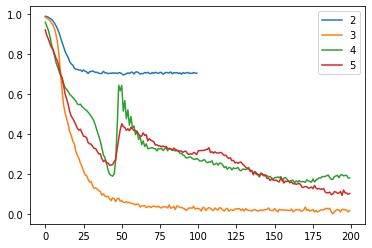

In [32]:
num_layers = range(2, 6)
for i in num_layers:
    if i == 2:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = i)
plt.legend()

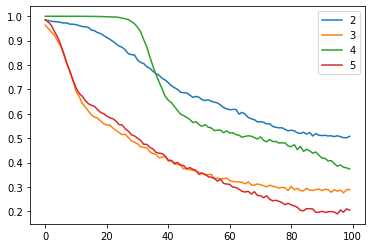

In [26]:
num_layers = range(2, 6)
for i in num_layers:
    if i == 2:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()[:100]
    plt.plot(loss, label = i)
plt.legend()

### Barren plataeus

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


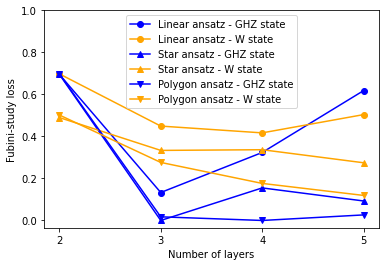

In [2]:
losss_polygon_ghz, losss_polygon_w, losss_star_ghz, losss_star_w, losss_linear_ghz, losss_linear_w = [], [], [], [], [], []
num_layers = range(2, 6)
for i in num_layers:
    if i == 2:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_polygon_w.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/polygon_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/polygon_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_polygon_ghz.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/star_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/star_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_w.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/linear_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/linear_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_linear_ghz.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/linear_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/linear_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_linear_w.append(np.min(loss))

plt.plot(num_layers, losss_linear_ghz, marker='o', color='blue', label = 'Linear ansatz - GHZ state')
plt.plot(num_layers, losss_linear_w, marker='o', color='orange', label = 'Linear ansatz - W state')
plt.plot(num_layers, losss_star_ghz, marker='^', color='blue', label = 'Star ansatz - GHZ state')
plt.plot(num_layers, losss_star_w, marker='^', color='orange',label = 'Star ansatz - W state')
plt.plot(num_layers, losss_polygon_ghz, marker='v', color='blue', label = 'Polygon ansatz - GHZ state')
plt.plot(num_layers, losss_polygon_w, marker='v', color='orange', label = 'Polygon ansatz - W state')
plt.xlabel('Number of layers')
plt.xticks(np.arange(2, 6, 1))
plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('Fubini-study loss')
# plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
plt.legend()
plt.savefig('compare_layer.eps', format = 'eps', dpi = 1000)

### Adding noise

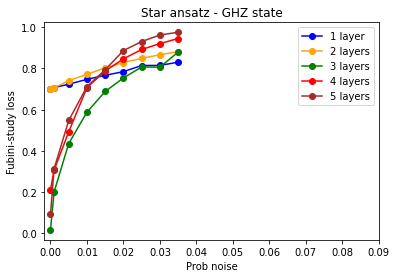

In [11]:
losss_star_ghz_1, losss_star_ghz_2 = [], []
losss_star_ghz_3, losss_star_ghz_4, losss_star_ghz_5 = [], [], []
num_noise = [0.0, 0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035]
for i in num_noise:
    path = "../experiments/star_ansatz_ghz/7/loss_values_qng1_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_1.append(np.min(loss))
for i in num_noise:
    path = "../experiments/star_ansatz_ghz/7/loss_values_qng2_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_2.append(np.min(loss))
for i in num_noise:
    path = "../experiments/star_ansatz_ghz/7/loss_values_qng3_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_3.append(np.min(loss))
for i in num_noise:
    path = "../experiments/star_ansatz_ghz/7/loss_values_qng4_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_4.append(np.min(loss))
for i in num_noise:
    path = "../experiments/star_ansatz_ghz/7/loss_values_qng5_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_5.append(np.min(loss))
plt.plot(num_noise, losss_star_ghz_1, marker='o', color='blue', label = '1 layer')
plt.plot(num_noise, losss_star_ghz_2, marker='o', color='orange', label = '2 layers')
plt.plot(num_noise, losss_star_ghz_3, marker='o', color='green', label = '3 layers')
plt.plot(num_noise, losss_star_ghz_4, marker='o', color='red', label = '4 layers')
plt.plot(num_noise, losss_star_ghz_5, marker='o', color='brown', label = '5 layers')
plt.xlabel('Prob noise')
plt.xticks(np.arange(0, 0.1, 0.01))
plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('Fubini-study loss')
plt.title('Star ansatz - GHZ state')
# plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
plt.legend()

0.0
0.0
0.0
0.0
0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


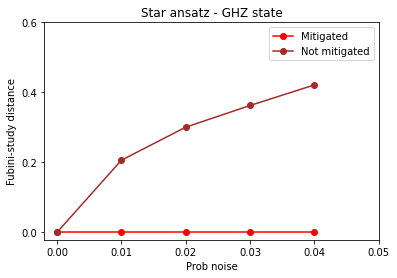

In [31]:
losss_star_ghz_mitigating, losss_star_ghz_nomitigating = [], []
num_noise = [0.00, 0.01, 0.02, 0.03, 0.04]
for i in num_noise:
    path = "./loss_values_qngm2_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_mitigating.append(np.min(loss))
    print(np.min(loss))
for i in num_noise:
    path = "./loss_values_qngnm2_" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz_nomitigating.append(np.min(loss))

plt.plot(num_noise, losss_star_ghz_mitigating, marker='o', color='red', label = 'Mitigated')
plt.plot(num_noise, losss_star_ghz_nomitigating, marker='o', color='brown', label = 'Not mitigated')
plt.xlabel('Prob noise')
plt.xticks(np.arange(0, 0.06, 0.01))
plt.yticks(np.arange(0, 0.7, 0.2))
plt.ylabel('Fubini-study distance')
plt.title('Star ansatz - GHZ state')
# plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
plt.legend()
plt.savefig('compare_mitigating2.eps', format = 'eps', dpi = 1000)

In [37]:
path = "./loss_values_qngm2_0.04.csv"
loss = pd.read_csv(path, sep=",", header=None).to_numpy()
thetass = pd.read_csv("./thetass_qngm2_0.04.csv", sep=",", header=None).to_numpy()

imin = np.argmin(loss)
thetas = thetass[imin]

import qiskit, qtm.nqubit
num_qubits = 5
num_layers = 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
print(psi)

Statevector([-7.08711347e-01+0.j,  1.00203401e-03+0.j,  1.37367906e-03+0.j,
              1.29969380e-05+0.j,  1.66033081e-06+0.j, -5.37137698e-05+0.j,
             -4.25119626e-05+0.j,  1.43529491e-03+0.j,  2.03290397e-05+0.j,
             -1.61529267e-03+0.j, -3.65592592e-06+0.j,  1.78332961e-06+0.j,
              3.86176693e-06+0.j, -1.14245343e-05+0.j,  1.19991057e-03+0.j,
              3.23874763e-03+0.j,  2.01923239e-03+0.j,  1.18598776e-03+0.j,
             -3.93034292e-06+0.j, -1.36414524e-06+0.j,  1.14608143e-05+0.j,
             -4.96313578e-07+0.j, -3.30031207e-03+0.j,  6.69459235e-05+0.j,
             -1.44767715e-03+0.j,  1.95786285e-05+0.j, -7.92948071e-04+0.j,
              4.62569238e-06+0.j, -3.61981277e-05+0.j,  2.47223440e-03+0.j,
              2.64788061e-03+0.j, -7.05461907e-01+0.j],
            dims=(2, 2, 2, 2, 2))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


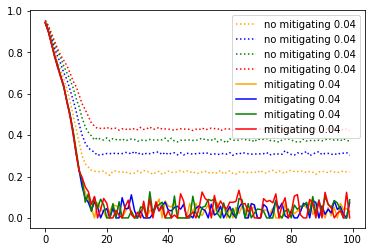

In [18]:

path = "./loss_values_qngnm2_0.01.csv"
loss1 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngnm2_0.02.csv"
loss2 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngnm2_0.03.csv"
loss3 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngnm2_0.04.csv"
loss4 = pd.read_csv(path, sep=",", header=None).to_numpy()
plt.plot(loss1, ':', color = 'orange', label = 'no mitigating ' + str(i))
plt.plot(loss2, ':', color = 'blue', label = 'no mitigating ' + str(i))
plt.plot(loss3, ':', color = 'green', label = 'no mitigating ' + str(i))
plt.plot(loss4, ':', color = 'red', label = 'no mitigating ' + str(i))
path = "./loss_values_qngm2_0.01.csv"
loss1 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngm2_0.02.csv"
loss2 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngm2_0.03.csv"
loss3 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngm2_0.04.csv"
loss4 = pd.read_csv(path, sep=",", header=None).to_numpy()
plt.plot(loss1, color = 'orange', label = 'mitigating ' + str(i))
plt.plot(loss2, color = 'blue', label = 'mitigating ' + str(i))
plt.plot(loss3, color = 'green', label = 'mitigating ' + str(i))
plt.plot(loss4, color = 'red', label = 'mitigating ' + str(i))

plt.legend()
plt.savefig('compare_mitigating.eps', format = 'eps', dpi = 1000)

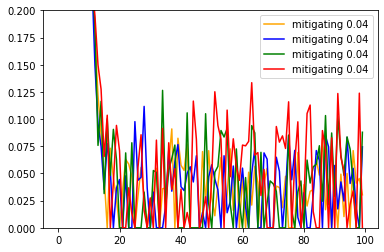

In [29]:
path = "./loss_values_qngm2_0.01.csv"
loss1 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngm2_0.02.csv"
loss2 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngm2_0.03.csv"
loss3 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "./loss_values_qngm2_0.04.csv"
loss4 = pd.read_csv(path, sep=",", header=None).to_numpy()
plt.plot(loss1, color = 'orange', label = 'mitigating ' + str(i))
plt.plot(loss2, color = 'blue', label = 'mitigating ' + str(i))
plt.plot(loss3, color = 'green', label = 'mitigating ' + str(i))
plt.plot(loss4, color = 'red', label = 'mitigating ' + str(i))
plt.ylim(0, 0.2)
plt.legend()